In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



In [2]:
data=pd.read_csv(r"C:\Users\mohan\Desktop\EXCEL r assignment\random forest\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
y=data["Taxable.Income"]

In [4]:
y.mean()


55208.375

In [5]:
max(y)

99619

In [6]:
min(y)

10003

In [7]:
y_f=pd.cut(y,bins=[0,30000,99620],labels=['Risky','Good'])
y_f.value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x29a5f750040>,
 'caps': [<matplotlib.lines.Line2D at 0x29a5f750700>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a5f734ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x29a5f750dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a5f75c160>],
 'means': []}

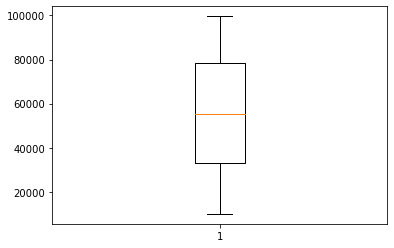

In [8]:
plt.boxplot(y)

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
 

tax_f= label_encoder.fit_transform(y_f)
 
tax_f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [11]:
x=data[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']]

In [12]:
x1=pd.get_dummies(x)

In [13]:
x1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [14]:
x_f=x1.values
x_f

array([[ 50047,     10,      1, ...,      1,      0,      1],
       [134075,     18,      0, ...,      0,      0,      1],
       [160205,     30,      1, ...,      0,      0,      1],
       ...,
       [154058,      0,      1, ...,      0,      0,      1],
       [180083,     17,      0, ...,      0,      1,      0],
       [158137,     16,      1, ...,      0,      1,      0]], dtype=int64)

In [15]:
y_f=tax_f

In [30]:
#Random Classifier
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=110, max_features=4)
results = cross_val_score(model, x_f, y_f, cv=kfold)


In [33]:
#Accuracy of random classifer
print(results.mean())

0.7433333333333334


In [40]:
# grid search
from sklearn.model_selection import GridSearchCV
param_grids = dict(n_estimators= range(50,100),max_features= range(1,10))
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_f,y_f)


Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV 1/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 1/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 2/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 2/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 3/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 3/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 4/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 4/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 5/5; 1/450] START max_features=1, n_estimators=50...........................
[CV 5/5; 1/450] END .........max_features=1, n_estimators=50; total time=   0.0s
[CV 1/5; 2/450] START max_features=1, n_estimators=51...........................
[CV 1/5; 2/450] END .........max_features=1, 

In [41]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.7533333333333332, using {'max_features': 4, 'n_estimators': 60}
